<a href="https://colab.research.google.com/github/natalia0911/Tarea_Practica_3_IA/blob/main/2022_1_Trabajo_Practico_03_NataliaVargas_FabricioElizondo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Instituto Tecnológico de Costa Rica**

**Escuela de Ingeniería en Computación**

**Curso: Inteligencia Artificial**

**Primer Semestre 2022**

**Profesor: Luis-Alexander Calvo-Valverde**

**Trabajo Práctico:** 03

**Datos de la entrega:** Lunes 30 de mayo 2022, a más tardar a las 11:59 pm

**Estudiantes:**
- Natalia Vanessa Vargas Reyes
- Fabricio Antonio Elizondo Fernández





___

# Nota Introductoria
___

Ustedes han sido contratados por la empresa *SoloIA* para trabajar con dos conjuntos de datos y lograr la mejor predicción posible, dadas ciertas métricas.

Para efectos de dudas o ampliaciones sobre el proyecto, además de lo que se indique en este cuaderno, considere a Luis-Alexánder Calvo-Valverde como su cliente para atender sus consultas.

**IMPORTANTE:** Entre los algoritmos elegidos para las partes 1 y 2, no debe usar ninguno visto en clase.  En caso de duda puede preguntar primero al profesor.

___

# Parte 1  -  Clasificación (50 puntos)
___

### Considere lo siguiente:
1. Conjunto de datos: **cardio.csv**
1. Algunos detalles del conjunto de datos los puede ver en: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset.  **Pero debe usar el conjunto de datos que se le dan adjuntos a este Trabajo Práctico, no descargar otro**.
1. El atributo a predecir es: **cardio**.
1. Proponga al menos dos algoritmos a utilizar
1. Métricas:
    1. Accuracy
    1. Ustedes propongan una más.
1. Debe presentar en este cuaderno:
    1. Pre-procesamiento de los datos, explicando las decisiones en cada caso.
    1. Para cada uno de los algoritmos seleccionados: 
        1. Explicación del algoritmo.
        1. Explicación de la implementación seleccionada y de sus parámetros.
    1. Explicación del diseño experimental por ejecutar. Recuerde que si el algoritmo requiere seleccionar hyperparámetros, hay que dividir en tres conjuntos de datos: Training, Validation, Testing (60%, 20%, 20%). Se le recomienda confirmar con el profesor cuántos y cuáles hyperparámetros validar.
    1. Programación del diseño experimental. 
    1. Tablas de resultados, gráficos y conclusiones de los resultados, recomendando a su contratante cuál algoritmo utilizar, con qué configuración y por qué lo recomienda. 

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

####Análisis del conjunto de datos


In [ ]:
# Se realiza la carga de los datos por utilizar 
dataset = pd.read_csv('cardio.csv', delimiter = ";")

# Se imprimen las dimensiones del arreglo
print(f"Las dimensiones del arreglo cargado son: {dataset.shape}")

#Se muestran los primeros 10 valores del conjunto de datos
dataset.head(10)

Las dimensiones del arreglo cargado son: (69301, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,1,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,2,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,3,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,4,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,5,23393,1,155,62.0,120,80,1,1,0,0,1,0
5,6,21143,1,164,61.0,100,70,1,1,0,0,1,0
6,7,18085,1,162,72.0,100,70,1,1,0,0,1,0
7,8,22547,1,161,93.0,140,90,2,1,0,0,1,1
8,9,21250,1,157,68.0,110,80,1,1,0,0,1,0
9,10,22446,1,158,65.0,140,90,3,1,0,0,1,1


####Tipo de dato de los atributos

In [ ]:
# Se realiza una comprobación del tipo de dato de cada columna
print(dataset.dtypes)

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object


Como se visualiza a apartir de la información anterior, nos encontramos con un conjunto de datos cuyas características se encuentran representadas por datos numéricos, donde al final del diseño experimental, lo que se busca es predecir el atributo de cardio. Dicho atributo es una variable binaria, lo que nos indica que nos encontramos ante un problema de clasificación binaria.

####Histogramas

A continuación se presenta de forma gráfica, los histogramas que muestren la distribución de los datos para cada uno de los atributos, lo cual nos puede brindar información útil sobre el comportamiento de los mismos, en caso de que se necesite realizar algún tratamiento especial previo a la ejecución de los algoritmos.

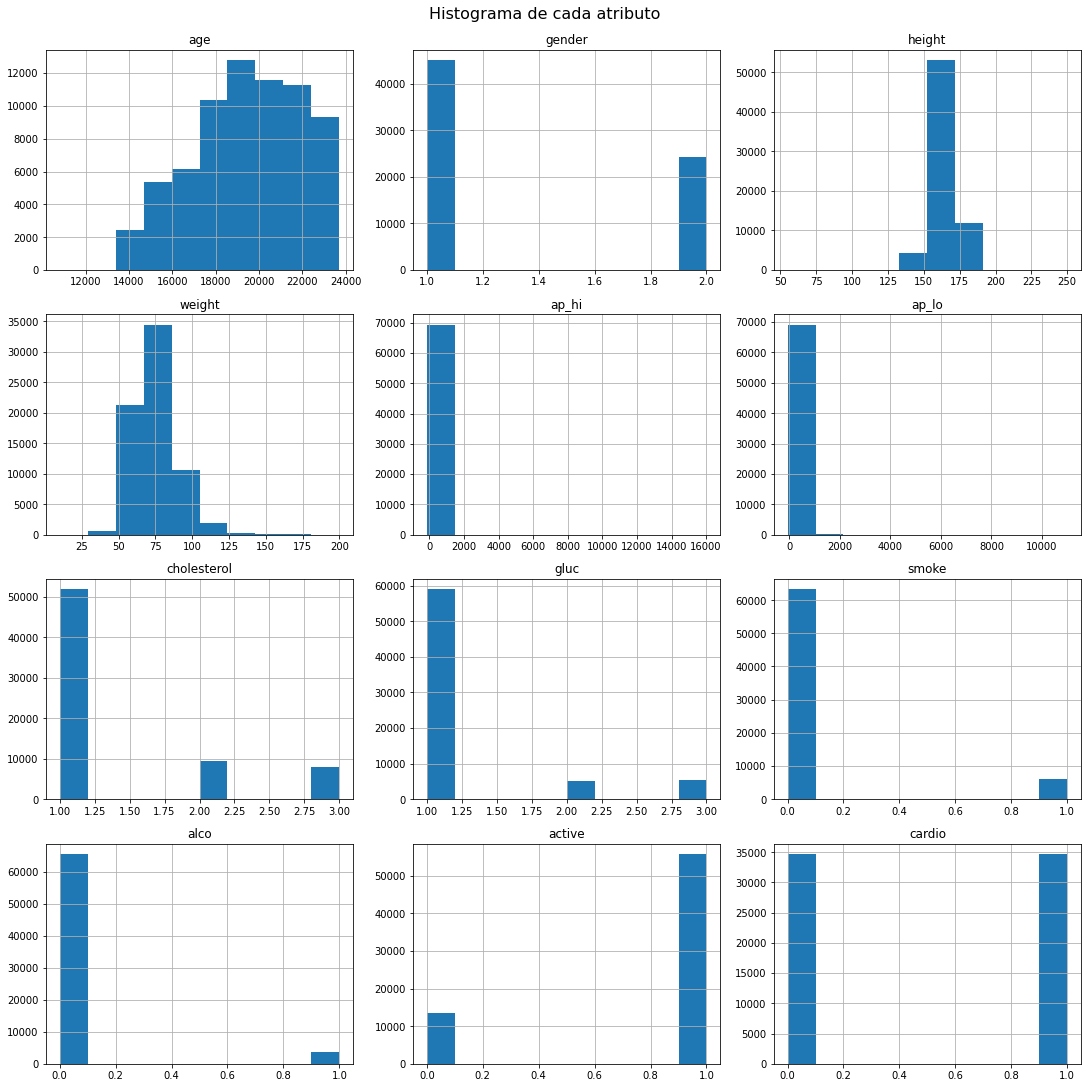

In [ ]:
# Se grafican cada uno de los atributos utilizando un histrograma
fig, axs = plt.subplots(4, 3, constrained_layout=True, figsize=(15,15))
fig.suptitle('Histograma de cada atributo', fontsize=16)

d = 1
for i in range(4):
  for j in range(3):
      axs[i,j].set_title(dataset.columns[d])
      dataset.iloc[:, d].hist(ax=axs[i,j])
      d += 1
plt.show()

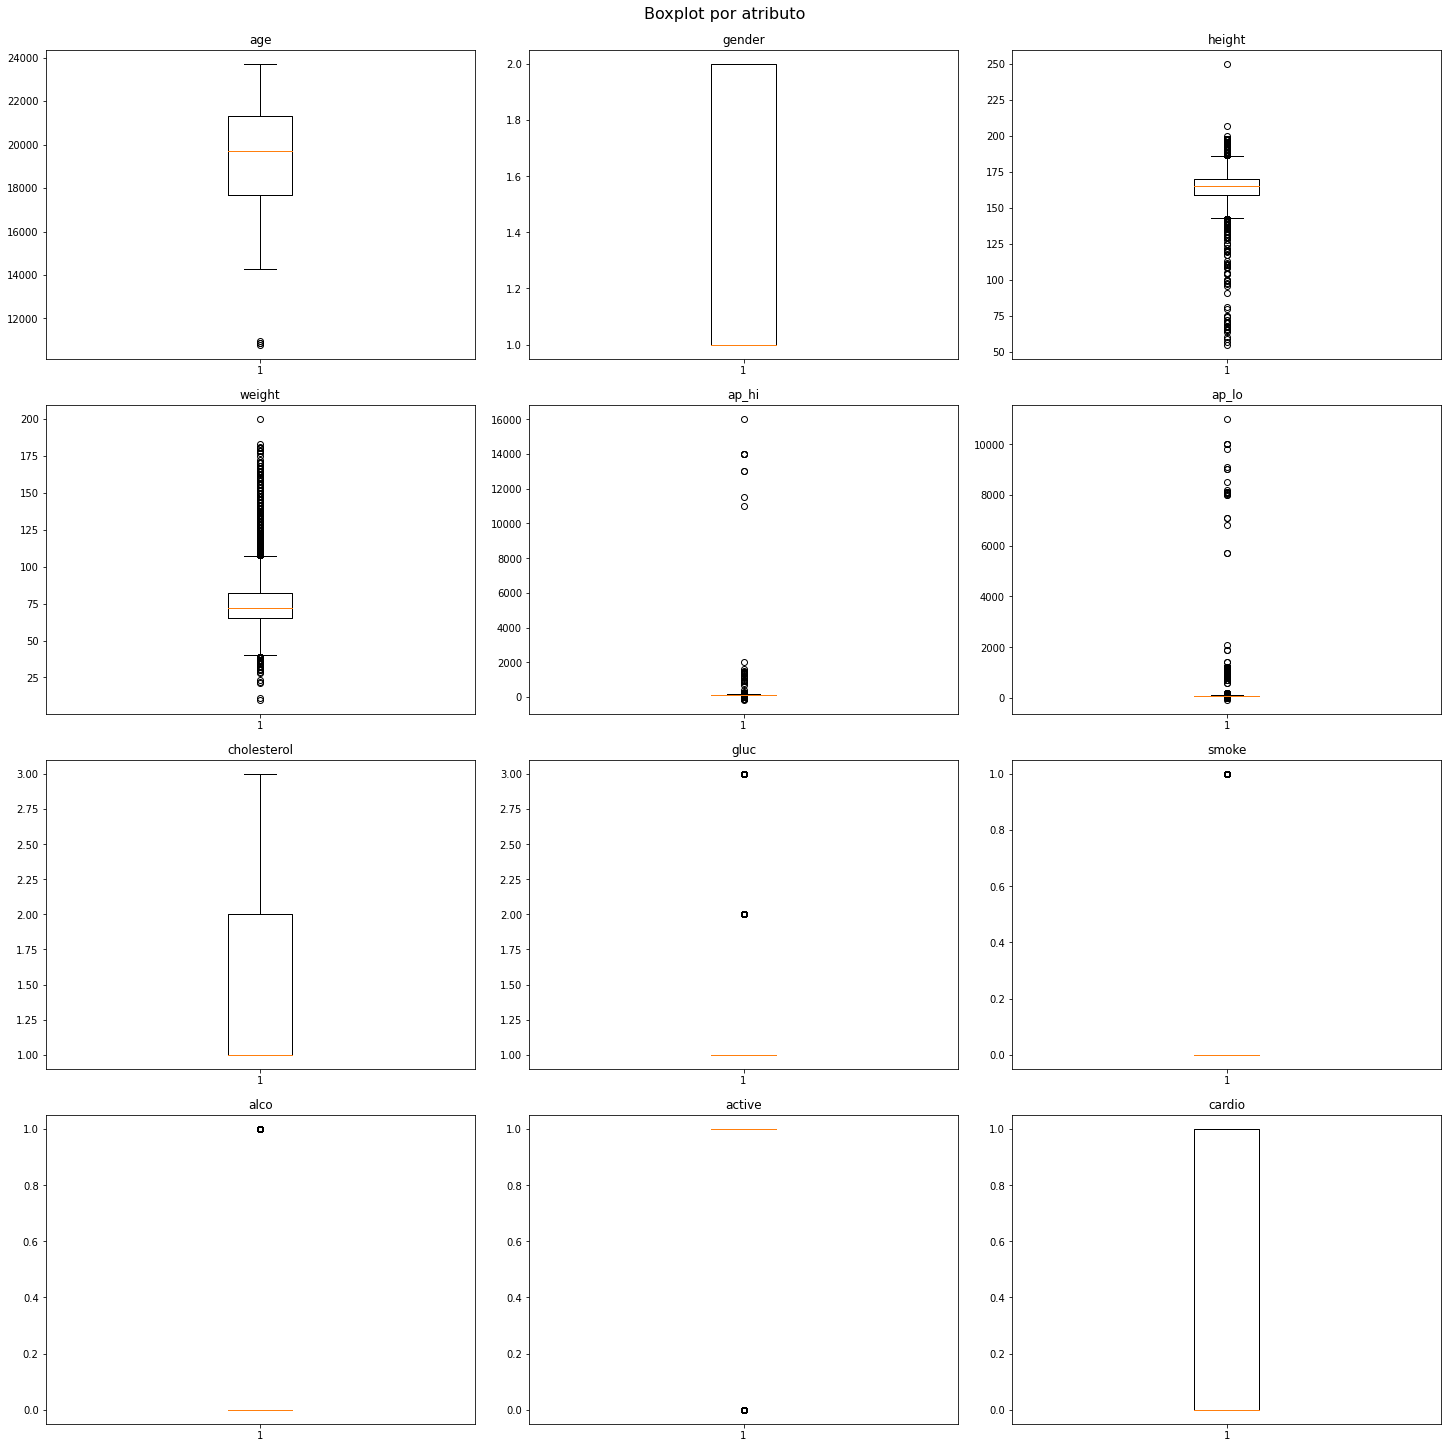

In [ ]:
# Se grafica con un boxplot cada uno de los atributos del dataset
fig, axs = plt.subplots(4, 3, constrained_layout=True, figsize=(20,20))
fig.suptitle('Boxplot por atributo', fontsize=16)

d = 1
for i in range(4):
  for j in range(3):
    axs[i,j].set_title(dataset.columns[d])
    axs[i,j].boxplot(dataset.iloc[:,d])
    d += 1

####Preprocesamiento de los datos

####Explicación de los algoritmos a utilizar

# Support Vector Machines (SVM)

SVMs constituye un conjunto de métodos para realizar aprendizaje supervisado, en escenarios de clasificación, regresión y detección de outliers. Dentro de los principales beneficios de utilizar esta familia de algoritmos, se pueden mencionar los siguientes:



*   Efectivos en espacios de muchas dimensiones
*   Eficiente en términos de manejo de memoria
*   Flexible a la hora de seleccionar los tipos función de kernel que se pueden incorporar en la función de toma de decisiones

De igual forma es necesario tener cuidado con el conjunto de datos que se vaya a predecir, ya que si el número de características de los datos es mucho mayor que el número de muestras obtenidas, la selección del tipo de kernel y la regularización utilizada se vuelven cruciales para obtener resultados adecuados.

SVM incluye las clases denomindas SVC, NuSVC y LinearSVC para efectuar clasificación tanto binaria como multiclases. Las dos primeras son muy similares pero utilizan formulaciones matemáticas distintas, y aceptan parámetros de configuración diferentes. Por su parte LinearSVC, representa otra implementación de SVC (Support Vector Classification) que utiliza por defecto un kernel de tipo lineal. Al igual que la mayoría de clasificadores, cualquiera de las clases mencionadas de SVC recibe como parámetro de entrada dos conjuntos, las muestras de training que corresponden con un arreglo de entrenamiento denominado **X**, de tamaño (numero_muestras, numero_caracteristicas), y un conjunto **Y** que representa las etiquetas de los tipos de clases que se van a predecir (con soporte para strings o valores enteros). El proceso de ajuste y modelado por medio de la función de decisión, se basa en el uso de vectores de soporte que el algoritmo obtiene dentro del mismo conjunto de entrenamiento. 



# Gaussian Process Classification (GPC)

GPC representa un tipo de clasificador que implementa procesos Gaussianos para efectuar clasificación de una forma probablilística. Un proceso Gaussiano es una generalización de la famosa distribución probabilística de Gauss, los cuales se pueden utilizar en algoritmos de clasificación de machine learning para predicción de modelos. Al igual que la familia de  métodos SVMs, este algoritmo se basa en el uso de kernels, aunque cuentan con la capacidad de predecir probabilidades calibradas con gran precisión, cosa que no puede lograr los clasificadores que brinda el SVC. Los kernels que se especifican en el algoritmo controlan como las muestras se relacionan entre ellos, definiendo específicamente la covarianza de los datos.  

####Diseño experimental

####Resultados y Conclusiones

___

# Parte 2  -  Clustering  (50 puntos)
___

### Considere lo siguiente:
1. Conjunto de datos: **descubrir_emociones.csv**
1. Este dataset corresponde a pixeles en imágenes, a partir de las cuales se desea descubrir cuántos grupos (clusters) se podrían encontrar. Se cree que son diferentes emociones de las personas en las imágenes (alegría, enojo, tristeza, etc).
1. Proponga al menos dos algoritmos a utilizar
1. Proponga una métrica, la cual debe ser **interna**.
1. Debe presentar en este cuaderno:
    1. Pre-procesamiento de los datos, explicando las decisiones en cada caso. Observará que en este caso viene bastante preparado
    1. Para cada uno de los algoritmos seleccionados: 
        1. Explicación del algoritmo.
        1. Explicación de la implementación seleccionada y de sus parámetros.
    1. Explicación del diseño experimental por ejecutar. En este caso recuerde que es aprendizaje NO Supervisado. Además en cuanto al número de clusters, se cree que es mayor que uno y menor que veinte. 
    1. Programación del diseño experimental. 
    1. Muestre en una tabla los resultados de la métrica.
    1. Grafique las métrica para ver el criterio del codo.
    1. ¿Cuál es el númermo de cluster que considera mejor describe el conjunto de datos? ¿Cómo defendería su recomendación ante su contratante? (Considere en su respuesta los algoritmos que utilizó)

##2.1. Preprocesamiento de los datos
En esta sección como un paso inicial, se carga se el dataset y se muestra algunas de las imagenes contenidas en este. 
Como parte del procesamiento, normalmente buscaríamos valores faltantes, outliers, y variables que haya que codificar. Pero para este dataset no es mecesario, pues se trata de pixeles, y todos están completos ya que todas las imágenes tienen la misma dimensión, además todas las variables, sabemos de ante mano que están en un valor de 0 a 255, por lo que no habrán outliers a menos que se haya hecho mal el dataset. 

Tampoco tenemos que codificar variables pues todas hacen referencia a pixeles. Esto también nos lleva a que no se pueden reducir atributos, al menos no para el problema que queremos resolver con este conjunto, porque nos interesa tener las imagenes completas. 

De igual forma, no consideramos necesario escalar los datos, porque todos se encuentran entre 0 y 255, son valores que tenemos por seguro que serán así. Si se desea se puede escalar, pero consideramos que no es indispensable en este caso, además de hizo la prueba en otro notebook para comprobar y al graficar el método del codo, la diferencia es mínima, pues si se escalan los datos solo se ve la curva más lisa. 

--------------------------------------------------

In [1]:
%matplotlib inline
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
emotions_df = pd.read_csv('/content/drive/MyDrive/1 SEMESTRE 2022/IA/Trabajo Práctico 3/descubrir_emociones.csv', header = 0, delimiter=';')  
#print(dataset.describe())
print(emotions_df.head(2))
#Ver las filas
#A veces no me cargan todas
print(emotions_df.shape[0])

    p1   p2   p3   p4   p5   p6   p7   p8   p9  p10  ...  p2295  p2296  p2297  \
0   70   80   82   72   58   58   60   63   54   58  ...    159    182    183   
1  151  150  147  155  148  133  111  140  170  174  ...    105    108     95   

   p2298  p2299  p2300  p2301  p2302  p2303  p2304  
0    136    106    116     95    106    109     82  
1    108    102     67    171    193    183    184  

[2 rows x 2304 columns]
24568


Se crea una función para reconstruir imagenes, en este caso solo se muestra una, pues el objetivo es ver los datos con los que estamos trabajando. 

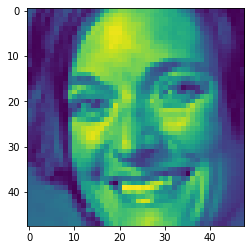

In [4]:
def displayImg(i):
  plt.imshow(emotions_df.loc[i].values.reshape(48,48))
#Mostrar la imagen en la fila 2457
displayImg(2457)

--------------------------------------------------

##2.2 Algoritmos de clustering

En esta sección vamos a presentar el desarrollo y explicación de los algoritmos de Mini-batch K-means clustering y Birch clustering. 

Se han elegido estos dos porque en general, usar ambos algoritmos derivados de k-means como Mini-batch t Bisecting K-means, no nos permitía aprender mucho más, así que se usó Mini-batch por rapidez. 

Tampoco pudimos usar los algoritmos de Spectral clustering, pues aunque estos tienen el hiperparámetro que nos interesa, que es el número de clusters, y además son interesantemente buenos con imágenes, pero no se pudo terminar de ejecutar pues después de incluso 10 horas no estaba listo. 

En el caso de los agglomerative clustering, no se pudo pues no cuentan con hiperparámetros a probar en el análisis experimental. 

Finalmente se intentó con otro método, que a pesar de no tener el número de clusters, nos podría dar una estimación del mismo, sin embargo es algo lerdo, por lo que solo se logró ejecutarlo con un tercio de los datos para que durara unas cuantas horas, no obstante no es parte de la presente tarea.

Por dichas razones se usan los algoritmos de Mini-Batch y Birch. 


###2.2.2 Mini-batch K-means Clustering

Este algoritmo es una variante del K means visto en clases, solo que utiliza lotes, para reducir el tiempo de cálculo e intenta optimizar la función de objetivo al mismo tiempo.
Los mini lotes son muestreados en cada iteración, la desventaja es que muestra peores resultados que el K means, pero con la ventaja de ser más rápido. 
Otro aspecto de este algortimo es que por cada lote, el centroide asignado, se actualiza, con el promedio de todas las muestras anteriores a ese centroide y a la larga, esto disminuye la tasa de cambio del mismo.

Para este ejemplo usamos este algoritmo por su rápidez, ya que otros aunque quizá más exactos, tardan incluso horas, y muchos otros no tenían el hiperparámetro de número de clúster que es requerido en esta tarea. 

* Con respecto a los hiperparámetros, tenemos el número de clusters, vamos a guardar las métricas cambiando este valor de 2 a 19 clústers. 
* El método de inicialización, es decir el init, se escogió como K-means++, porque este selecciona los centroides iniciales para el agrupamiento, y lo hace de manera más inteligente. 
* Max_iter es el número de iteraciones que se hacen sobre el conjunto, el default es 100, pero se dejó 300 para ver si logra mejores resultados.
* N_init, número de veces que se ejecutará el algoritmo con semillas de centroide diferente. 
* Random_state es para la inicialización de los centroides, de manera random. El valor elegido es la semilla.
* Por último el batch_size es el tamaño de los mini lotes, en este caso es de 1024 porque es el valor preterminado y porque parece un valor adecuado para asegurar que sea un poco más rápido.



In [ ]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import calinski_harabasz_score

#Sum of squares based indexes
SSBI_Batches = []
wcss= []
#De 2 a 19
for i in range(2,20): 
    miniB_KMeans = MiniBatchKMeans(n_clusters=i, init="k-means++",max_iter=300, n_init=20, random_state=0, batch_size=1024) #max_iter por default es 300
    miniB_KMeans.fit(emotions_df)
    c_score = calinski_harabasz_score(emotions_df, miniB_KMeans.labels_)
    wcss.append(miniB_KMeans.inertia_)
    SSBI_Batches.append(c_score)


#### Método del codo usando WCSS 
Suma de los cuadrados de las distancias (Within cluster sum of squares), en este caso el algoritmo trae dicha métrica con el atributo inertia_.  


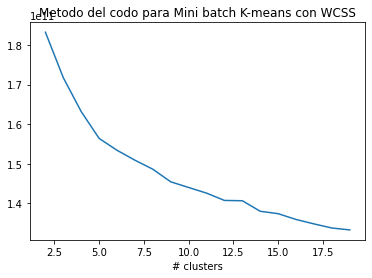

In [ ]:
plt.plot(range(2,20),wcss) 
plt.title("Metodo del codo para Mini batch K-means con WCSS")
plt.xlabel("# clusters")
plt.show() 

#### Método del codo usando SSBI 
Otra métrica que decidimos usar es un indice basado en la suma de cuadrados (Sum of squares based indexes), en este caso más especificamente calinski_harabasz_score que se encuentra en sklearn. 
Se escogió esta métrica ya que no tenemos los valores reales de las etiquetas, y porque es un buen criterio para la relación de la varianza, en la que una puntuación más alta significa que el modelo tiene clusters mejor definidos. El indice es la relación de la suma de la disperción entre los clusters.  

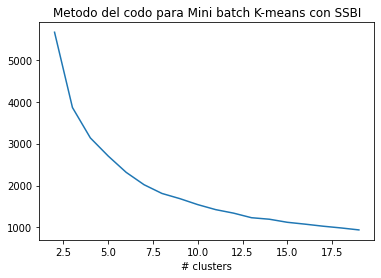

In [ ]:
plt.plot(range(2,20),SSBI_Batches) 
plt.title("Metodo del codo para Mini batch K-means con SSBI")
plt.xlabel("# clusters")
plt.show() 

#### Guardado de métricas para método del codo en Mini-batch K-means Clustering
Se guardan los valores de las métricas usadas, en este caso inertia_, que es una métrica que incluye el modelo y calinski harabasz, ambas para ilustrar la gráfica del codo.

In [ ]:
from joblib import dump
dump(SSBI_Batches, 'SSBI_Batches_Kmeans.joblib') 
dump(wcss, 'wcss_Batches_Kmeans.joblib') 

['wcss_Batches_Kmeans.joblib']

#### Recuperación de métricas para método del codo en Mini-batch K-means Clustering
Los archivos que contienen la información de métricas se encuentran en drive. De manera que solo tenemos que cargarlas aquí para no correr el algoritmo desde cero, ya que en particular algunos aunque no Mini batch, suelen ser muy tardados. 

In [5]:
from joblib import load
SSBI_Batches = load('/content/drive/MyDrive/1 SEMESTRE 2022/IA/Trabajo Práctico 3/SSBI_Batches_Kmeans.joblib') 
wcss = load('/content/drive/MyDrive/1 SEMESTRE 2022/IA/Trabajo Práctico 3/wcss_Batches_Kmeans.joblib') 

#### Resultados de las métricas WCSS Y SSBI para Mini-Batch

In [15]:
for i in range(len(wcss)):
  print("Número de clústers:", i+2, " métrica WCSS:", wcss[i], " métrica SSBI:", SSBI_Batches[i])

Número de clústers: 2  métrica WCSS: 183202451031.01837  métrica SSBI: 5657.253690167098
Número de clústers: 3  métrica WCSS: 171723611834.94717  métrica SSBI: 3861.6757363918655
Número de clústers: 4  métrica WCSS: 163172067683.95502  métrica SSBI: 3136.6503315769355
Número de clústers: 5  métrica WCSS: 156403111077.88257  métrica SSBI: 2703.3651208526217
Número de clústers: 6  métrica WCSS: 153411595583.83008  métrica SSBI: 2315.612658029577
Número de clústers: 7  métrica WCSS: 150902526611.58148  métrica SSBI: 2020.1022753477064
Número de clústers: 8  métrica WCSS: 148629808927.5461  métrica SSBI: 1811.7498527075645
Número de clústers: 9  métrica WCSS: 145450152297.74292  métrica SSBI: 1688.0514423543357
Número de clústers: 10  métrica WCSS: 144017435348.67828  métrica SSBI: 1545.3415604830068
Número de clústers: 11  métrica WCSS: 142598798158.50568  métrica SSBI: 1425.9942860719889
Número de clústers: 12  métrica WCSS: 140751203615.245  métrica SSBI: 1342.318063114689
Número de clú

--------------------------------------------------

###2.2.1 Birch clustering

Balanced Iterative Reducing and Clustering using Hierarchies (BIRCH) es un algoritmo de agrupamiento que puede agrupar grandes conjuntos de datos generando primero un resumen pequeño y compacto del gran conjunto de datos que conserva la mayor cantidad de información posible. Este resumen más pequeño luego se agrupa en clústeres en lugar de agrupar el conjunto de datos más grande.

Este algoritmo usa eficientemente la memoria, y es una alternativa al algoritmo anterior. 
Pero en el caso de birch, contruye una estructura de datos de árbol con centroides del clúster que se leen de la hoja.


* El número de clústers es importante porque es el hiperparámetro que necesitamos para graficar el método del codo.
* Compute_labels, por default es true, es para calcular las etiquetas en cada ajuste. 
* El branching factor, por defecto es 50, y limita el número de subclusters en un nodo. Este valor se dejó así, porque cambiarlo habría que analizar los resultados con otros valores. 
* Y el threshold o umbral, limita la distancia entre la muestra entrante y los subclusters existentes. Este valor si se escoge muy bajo promueve la división, y viceversa si se escoge alto, por eso se eligió un punto medio. 


In [ ]:
from sklearn.cluster import Birch
from sklearn.metrics import calinski_harabasz_score
#Sum of squares based indexes
SSBI = []

#De 2 a 19
for i in range(2,20): 
  birch = Birch(n_clusters=i, compute_labels = True, branching_factor = 50, threshold = 0.5) 
  birch.fit(emotions_df)
  c_score = calinski_harabasz_score(emotions_df, birch.labels_)
  SSBI.append(c_score)


#### Método del codo usando SSBI 
Como ya se había explicado en la sección anterior, elegimos esta métrica de calinski_harabasz_score porque se encuentra en sklearn y nos sirve para cuando no tenemos los valores reales de las etiquetas. 

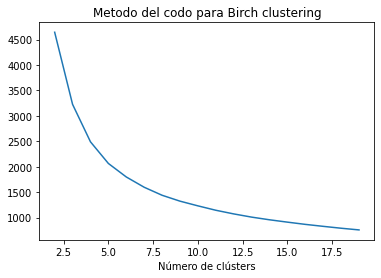

In [22]:
plt.plot(range(2,20),SSBI) 
plt.title("Metodo del codo para Birch clustering")
plt.xlabel("Número de clústers")
plt.show() 

#### Guardado de métricas para método del codo en Birch clustering
Se guardan los valores de las métricas usadas, en este caso calinski Harabasz, que es una métrica elegida pues este modelo no cuenta con una definida, como en el caso de Mini-batch k-means.

In [ ]:
from joblib import dump, load
dump(SSBI, 'SSBI_Birch.joblib') 


['SSBI_Birch.joblib']

#### Recuperación de métricas para método del codo en Birch clustering
Los archivos que contienen la información de métricas se encuentran en drive. De manera que solo tenemos que cargarlas aquí para no correr el algoritmo desde cero para obtenerlas, ya que en particular algunos algoritmos suelen ser muy tardados, como fue el caso de este con aproximadamente 5 horas. 

In [21]:
from joblib import load
SSBI = load('/content/drive/MyDrive/1 SEMESTRE 2022/IA/Trabajo Práctico 3/SSBI_Birch.joblib') 


#### Resultados de la métrica SSBI para Birch

In [23]:
for i in range(len(SSBI)):
  print("Número de clústers:", i+2, " métrica SSBI:", SSBI[i])

Número de clústers: 2  métrica SSBI: 4645.300767972804
Número de clústers: 3  métrica SSBI: 3227.4087552663927
Número de clústers: 4  métrica SSBI: 2490.804700605051
Número de clústers: 5  métrica SSBI: 2065.2963364180423
Número de clústers: 6  métrica SSBI: 1799.837396664531
Número de clústers: 7  métrica SSBI: 1597.5154628394953
Número de clústers: 8  métrica SSBI: 1440.1079574853766
Número de clústers: 9  métrica SSBI: 1324.1741926471777
Número de clústers: 10  métrica SSBI: 1231.9092697676144
Número de clústers: 11  métrica SSBI: 1145.3670134345566
Número de clústers: 12  métrica SSBI: 1073.5304128733544
Número de clústers: 13  métrica SSBI: 1010.3417682438119
Número de clústers: 14  métrica SSBI: 957.7757832338375
Número de clústers: 15  métrica SSBI: 911.6180090196063
Número de clústers: 16  métrica SSBI: 867.6880629137272
Número de clústers: 17  métrica SSBI: 828.93829592115
Número de clústers: 18  métrica SSBI: 791.8783945033416
Número de clústers: 19  métrica SSBI: 758.7564934

--------------------------------------------------

##2.3 Diseño experimental 


In [ ]:
#Funcion que devuelve el mejor hiperparametro, según las métricas obtenidas
def getBetter(hyperameter,metrics):
  index = 0
  high = 0
  for m in range(len(metrics)):
    if metrics[m]>high:
      high = metrics[m]
      index = m
  return hyperameter[index]


In [ ]:
def imprimirMetricas(hyperameter,metrics):
  for h in range(hyperameter):
    print("Para el hiperparámetro",hyperameter[h], "la métrica interna de silhouette coefficient es",metrics[h] )

###2.3.1 Diseño experimental para Mini-batch K-means Clustering

In [ ]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

Silluete_batches = []
sizeBatches = [256,512,768,1024,1280,1536,1792,2048]
#Probar el métricas para diferentes tamaños de lotes
for batch in sizeBatches: 
    kmeans = MiniBatchKMeans(n_clusters=7, init="k-means++",max_iter=300, n_init=20, random_state=0, batch_size=batch) #max_iter por default es 300
    kmeans.fit(emotions_df)
    s_score = silhouette_score(emotions_df, kmeans.labels_, metric='euclidean')
    Silluete_batches.append(s_score)


In [ ]:
from joblib import dump, load
dump(Silluete_batches, 'Silluete_batches.joblib') 


['Silluete_batches.joblib']

In [ ]:
Silluete_batches

[0.07015199442130919,
 0.0662442004398201,
 0.06757160309473198,
 0.07020957230207354,
 0.07094075620135525,
 0.07157794364682703,
 0.06766124018319462,
 0.07291261104961583]

In [ ]:
getBetter(hyperameter,metrics)

###2.3.2 Diseño experimental para Birch clustering

In [ ]:
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score
from google.colab import files
from joblib import dump


Silluete_birch = []
threshold_values = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for td in threshold_values: 
  birch = Birch(n_clusters=7, compute_labels = True, branching_factor = 50, threshold = td) 
  birch.fit(emotions_df)
  s_score = silhouette_score(emotions_df, birch.labels_, metric='euclidean')
  Silluete_birch.append(s_score)


dump(Silluete_birch, 'Silluete_birch.joblib') 
files.download("Silluete_birch.joblib")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from joblib import load
Silluete_birch = load('Silluete_birch.joblib') 

--------------------------------------------------

##2.4 Conclusión

concluir aqui

--------------------------------------------------

##Opcionalmente se muestran gráficas de los clústers


### Mini-batch K-means clustering

In [18]:
from sklearn.cluster import MiniBatchKMeans
miniB_KMeans = MiniBatchKMeans(n_clusters=7, init="k-means++",max_iter=300, n_init=7, random_state=0, batch_size=1024)
miniB_KMeans.fit(emotions_df)

result = miniB_KMeans.predict(emotions_df)

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_emotions = pca.fit_transform(emotions_df)
pca_emotions_df =  pd.DataFrame(data= pca_emotions, columns=['C1','C2'])
pca_emotions_clusters = pd.concat([pca_emotions_df,  pd.DataFrame(result)],axis = 1)
pca_emotions_clusters = pca_emotions_clusters.rename({0: 'Label'}, axis=1)
pca_emotions_clusters.head()

,C1,C2,Label
0,701.059432,332.086134,2
1,-60.482652,-503.266130,6
2,-231.780172,-489.782343,6
3,-401.480258,1276.986873,1
4,1027.018325,1099.774340,2


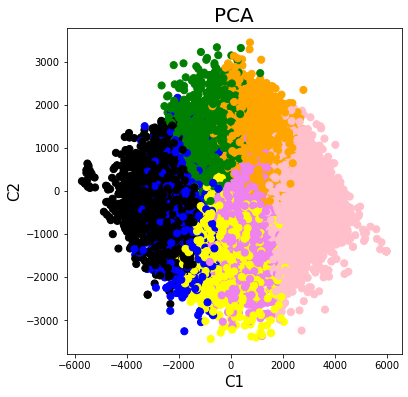

In [20]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('C1', fontsize = 15)
ax.set_ylabel('C2', fontsize = 15)
ax.set_title('PCA', fontsize = 20)

colors =  np.array(['blue', 'green', 'orange','pink','black','yellow','violet'])
ax.scatter(x=pca_emotions_clusters.C1, y=pca_emotions_clusters.C2, c=colors[pca_emotions_clusters.Label], s=50)
plt.show()

### Birch clustering

In [24]:
from sklearn.cluster import Birch
birch = Birch(n_clusters=7, compute_labels = True, branching_factor = 60, threshold = 0.5)
birch.fit(emotions_df)

result = birch.predict(emotions_df)

In [ ]:
from sklearn.decomposition import PCA
pca_b = PCA(n_components=2)
pca_emotions_b = pca_b.fit_transform(emotions_df)
pca_emotions_df_b =  pd.DataFrame(data= pca_emotions_b, columns=['C1','C2'])
pca_emotions_clusters_b = pd.concat([pca_emotions_df_b,  pd.DataFrame(result)],axis = 1)
pca_emotions_clusters_b = pca_emotions_clusters_b.rename({0: 'Label'}, axis=1)
pca_emotions_clusters_b.head()

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('C1', fontsize = 15)
ax.set_ylabel('C2', fontsize = 15)
ax.set_title('PCA', fontsize = 20)

colors =  np.array(['blue', 'green', 'orange','pink','black','yellow','violet'])
ax.scatter(x=pca_emotions_clusters_b.C1, y=pca_emotions_clusters_b.C2, c=colors[pca_emotions_clusters_b.Label], s=50)
plt.show()